In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Investor:
    def __init__(self, id, type):
        self.id = id
        self.type = type  # 'rational' or 'non_rational'
        self.sentiment = random.uniform(0.4, 0.6)

    def decide(self, price, fundamental):
        if self.type == "rational":
            if price < fundamental: return "buy"
            elif price > fundamental: return "sell"
            else: return "hold"
        else:
            if self.sentiment > 0.6: return "buy"
            elif self.sentiment < 0.4: return "sell"
            else: return "hold"


In [3]:
class Market:
    def __init__(self):
        self.price = 100
        self.fundamental = 100
        self.agents = [Investor(i, "rational") for i in range(30)] + \
                      [Investor(i, "non_rational") for i in range(70)]
        self.history = [self.price]

    def step(self):
        buys, sells = 0, 0
        for a in self.agents:
            action = a.decide(self.price, self.fundamental)
            if action == "buy": buys += 1
            elif action == "sell": sells += 1
        change = (buys - sells) / len(self.agents)
        self.price *= (1 + 0.05 * change)
        self.history.append(self.price)

    def run(self, steps=100):
        for _ in range(steps):
            self.step()

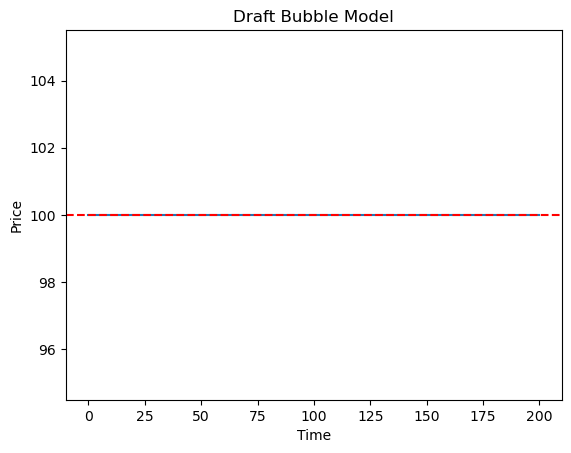

In [4]:
m = Market()
m.run(200)

plt.plot(m.history)
plt.axhline(100, color='r', linestyle='--')
plt.title("Draft Bubble Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()